# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The used car dealership industry operates in a competitive market where pricing plays a crucial role in attracting buyers and maximizing profitability. Dealerships must balance affordability for customers while ensuring they generate sufficient revenue from each sale. The value of a used car is influenced by multiple factors, including its age, mileage, condition, manufacturer reputation, fuel type, and demand for specific models.

Understanding these factors is essential for dealerships to set competitive prices, manage inventory effectively, and provide accurate trade-in valuations. Seasonal trends, regional preferences, and economic conditions also impact pricing strategies. By gaining insights into what consumers prioritize when purchasing a used car, dealerships can refine their sales approach, improve marketing efforts, and make data-backed decisions that enhance profitability and customer satisfaction.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Before building models, it is essential to explore and assess the dataset to ensure its quality and relevance. The following steps will be taken to understand the dataset:

1. **Initial Exploration**: Load the dataset and inspect its structure using summary statistics, column names, and data types.
2. **Handling Missing Values**: Identify columns with missing values and determine appropriate handling techniques such as imputation or removal.
3. **Identifying Outliers**: Detect extreme values in key numerical features (e.g., price, mileage, year) that may indicate data entry errors.
4. **Categorical Feature Analysis**: Examine unique values in categorical fields (e.g., manufacturer, fuel type, transmission) to understand distribution and potential grouping needs.
5. **Correlation Analysis**: Evaluate relationships between numerical variables to identify significant predictors of price.
6. **Feature Distributions**: Visualize distributions of key features to detect skewness or anomalies that may impact modeling.

These steps will provide insights into data quality issues, inform necessary preprocessing steps, and ensure that the dataset is well-prepared for analysis.


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import make_column_transformer, make_column_selector
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import VarianceThreshold 
from sklearn.inspection import permutation_importance

**Read in the `vehicles.csv` file**

In [232]:
#Load dataset
df = pd.read_csv('data/vehicles.csv')

In [234]:
#Read header
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [236]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [238]:
#Describe
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [240]:
#check missing values
missing_values = df.isnull().sum()
missing_values

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [242]:
# missing value percentage
missing_percentage = (missing_values / len(df)) * 100
df_missing = pd.DataFrame({
    "Feature": missing_values.index,
    "Missing Values": missing_values.values,
    "Percentage": missing_percentage.values
})
#Sort
df_missing = df_missing[df_missing["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

#Print
df_missing

,Feature,Missing Values,Percentage
14,size,306361,71.767476
7,cylinders,177678,41.622470
6,condition,174104,40.785232
12,VIN,161042,37.725356
13,drive,130567,30.586347
16,paint_color,130203,30.501078
15,type,92858,21.752717
4,manufacturer,17646,4.133714
10,title_status,8242,1.930753
5,model,5277,1.236179


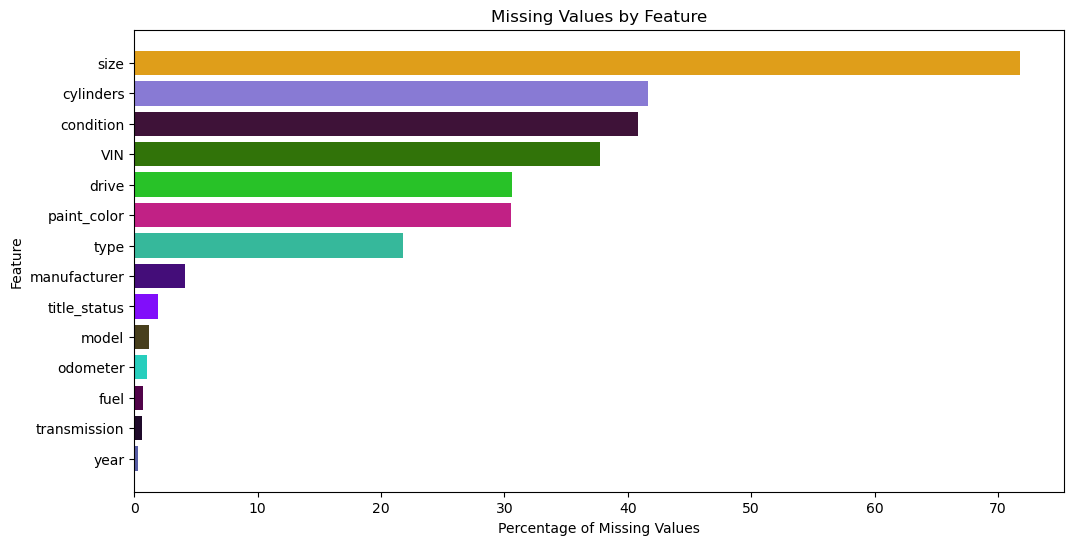

In [244]:
#Plot missing value percent by feature
colors = np.random.rand(len(df_missing["Feature"]), 3)

plt.figure(figsize=(12, 6))
plt.barh(df_missing["Feature"], df_missing["Percentage"], color=colors)
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Feature")
plt.title("Missing Values by Feature")
plt.gca().invert_yaxis()  # Invert to show highest missing values on top
plt.show()

- size has alot of missing values should be deleted.
- id, and VIN are unique values should be deleted.

### Evaluate features 

In [246]:
#Min and max for price
df['price'].describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

- We have extremely high prices and 0 values for cars.
- **We will have a range of 500 to 200,000**

In [248]:
# Get min and max for the year of a car
df['year'].describe()

count    425675.000000
mean       2011.235191
std           9.452120
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

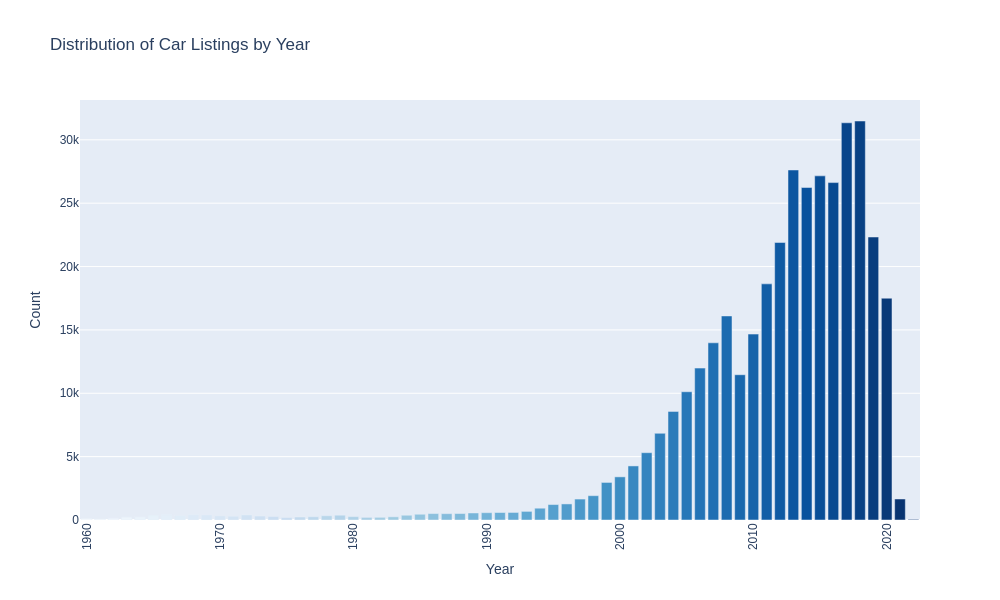

In [252]:
#Plot year value counts from 1960 till now with price range from 500 to 200,000
filtered_year_price = df[(df['year'] >= 1960) & (df['year'] <= 2025) & (df['price'] >= 500) & (df['price'] <= 200000)]

#Count occurrences of each year
year_counts = filtered_year_price['year'].value_counts().sort_index()

#Bar chart with a muted color palette
fig = px.bar(
    x=year_counts.index,
    y=year_counts.values,
    labels={'x': 'Year', 'y': 'Count'},
    title="Distribution of Car Listings by Year",
    color=year_counts.index,  # Assigning different colors per year
    color_continuous_scale="blues"  # Muted blue color scheme
)

fig.update_layout(
    xaxis=dict(tickangle=-90),
    height=600,
    width=1000,
    coloraxis_showscale=False  # Hide the color scale for a cleaner look
)

fig.show("png")

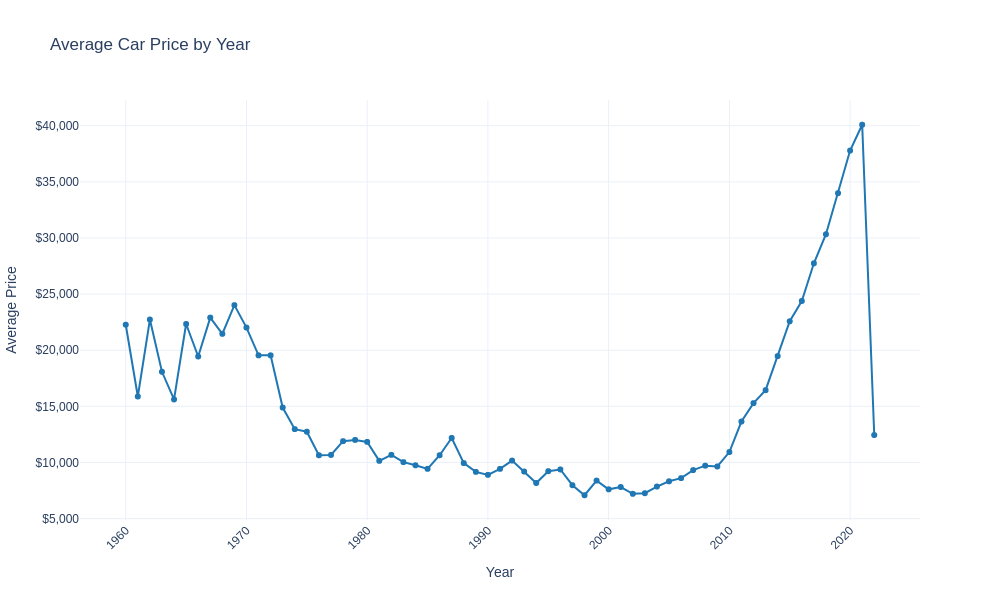

In [254]:
# Calculate the average price per year
avg_price_by_year = filtered_year_price.groupby("year")["price"].mean().reset_index()
avg_price_by_year.columns = ['Year', 'Average Price']

# Create a Plotly line chart
fig = px.line(
    avg_price_by_year, 
    x="Year", 
    y="Average Price", 
    markers=True,  # Show markers at each point
    title="Average Car Price by Year",
    line_shape="linear",
    color_discrete_sequence=["#1f77b4"]  # Muted blue color
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Average Price",
    height=600,
    width=1000,
    template="plotly_white",
    xaxis=dict(tickangle=-45),
    yaxis_tickprefix="$",
    yaxis_tickformat=","
)

fig.show("png")

- According to wikipedia car sales grew in the 1960's.
- **We will filter year 1960 and newer.**
- **Will have to convert year into an integer, currently it's a float**
- For years 2021 and 2022 seems like during the pendamic 

In [256]:
# Get value counts for condition
filtered_year_price['condition'].value_counts()

condition
good         117964
excellent     92080
like new      19470
fair           6434
new             990
salvage         536
Name: count, dtype: int64

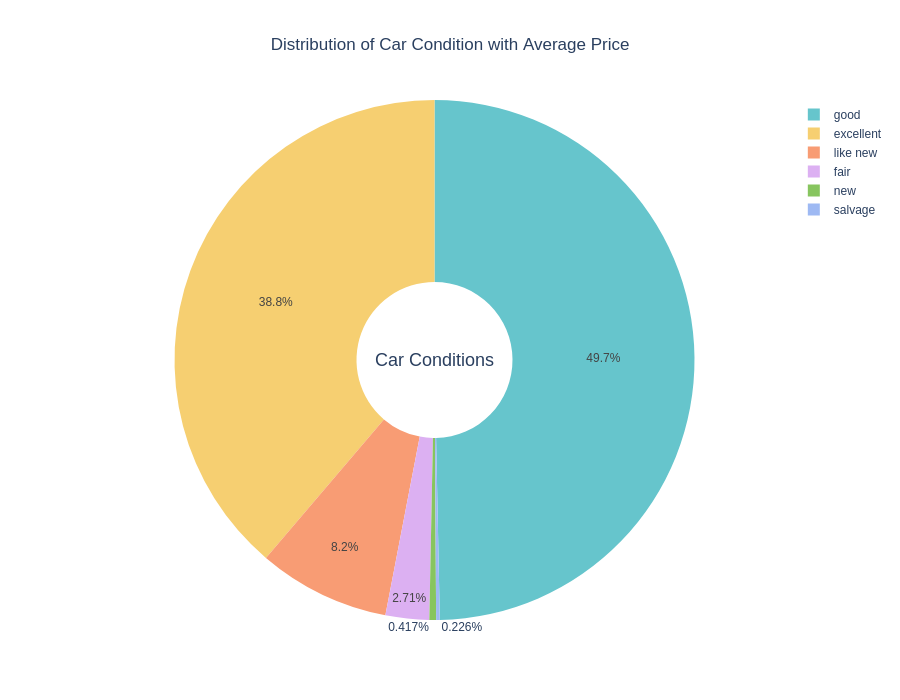

In [258]:
# Calculate value counts for car condition
condition_counts = filtered_year_price['condition'].value_counts().reset_index()
condition_counts.columns = ['Condition', 'Count']

# Calculate the correct average price per condition
avg_price_per_condition = filtered_year_price.groupby("condition", as_index=False)["price"].mean()
avg_price_per_condition.columns = ['Condition', 'Average Price']

# Merge both DataFrames to align condition counts with their respective average prices
condition_df = condition_counts.merge(avg_price_per_condition, on='Condition')

# Format average price for readability
condition_df['Average Price'] = condition_df['Average Price'].apply(lambda x: f"${x:,.0f}")

# Create an interactive Plotly pie chart
fig = go.Figure(data=[
    go.Pie(
        labels=condition_df['Condition'],
        values=condition_df['Count'],
        hoverinfo='label+percent+value+text',
        textinfo='percent',
        marker=dict(colors=px.colors.qualitative.Pastel),
        hole=0.3,  # Adds a donut effect for better readability
        text=condition_df['Average Price']  # Displays average price in hover text
    )
])

# Update layout for better visualization
fig.update_layout(
    title_text="Distribution of Car Condition with Average Price",
    title_x=0.5,  # Centers the title
    height=700,  # Increase size
    width=900,  # Increase size
    annotations=[dict(
        text="Car Conditions", x=0.5, y=0.5, font_size=18, showarrow=False
    )]  # Adds text annotation in the middle
)

# Show interactive plot
fig.show("png")

In [260]:
#Average price by condition
condition_df

,Condition,Count,Average Price
0,good,117964,"$21,093"
1,excellent,92080,"$15,754"
2,like new,19470,"$19,495"
3,fair,6434,"$4,016"
4,new,990,"$30,424"
5,salvage,536,"$3,939"


- **Will have to filter out new cars**
- New cars have the highest price but make up a tiny portion of the dataset.
- "Good" condition cars are priced higher than "Excellent", suggesting variations in how condition is labeled or differences in manufacturer value.
- Salvage and Fair condition cars suffer a massive price drop, indicating that buyers place heavy importance on vehicle history and condition.


In [262]:
# Manufacturer value counts
filtered_year_price['manufacturer'].value_counts()

manufacturer
ford               63070
chevrolet          48995
toyota             30929
honda              19409
nissan             16952
jeep               16790
ram                16170
gmc                15170
bmw                13310
dodge              11615
mercedes-benz      10070
hyundai             9130
subaru              8774
volkswagen          8504
lexus               7592
kia                 7309
audi                7014
cadillac            6441
acura               5555
chrysler            5508
buick               5064
mazda               4930
infiniti            4406
lincoln             3986
volvo               3251
mitsubishi          3008
mini                2214
pontiac             2162
rover               1934
jaguar              1865
porsche             1273
saturn              1060
mercury             1039
alfa-romeo           857
tesla                836
fiat                 754
harley-davidson      136
ferrari               65
datsun                59
aston-martin

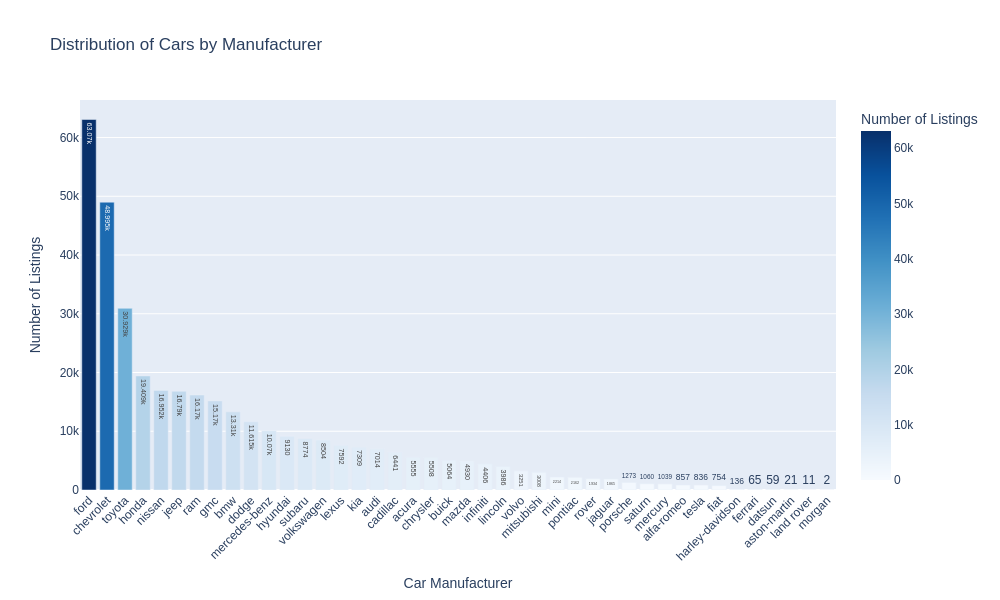

In [264]:
#Manufacturer counts
manufacturer_counts = filtered_year_price['manufacturer'].value_counts().reset_index()
manufacturer_counts.columns = ['Manufacturer', 'Count']

# Create an interactive Plotly bar chart
fig = px.bar(
    manufacturer_counts,
    x='Manufacturer',
    y='Count',
    title="Distribution of Cars by Manufacturer",
    labels={'Count': 'Number of Listings', 'Manufacturer': 'Car Manufacturer'},
    text_auto=True,  # Display values on bars
    color='Count',  # Color based on count for better visualization
    color_continuous_scale='Blues'  # Use a blue color scale
)

# Update layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust figure height
    width=1000  # Adjust figure width
)

# Show interactive plot
fig.show("png")

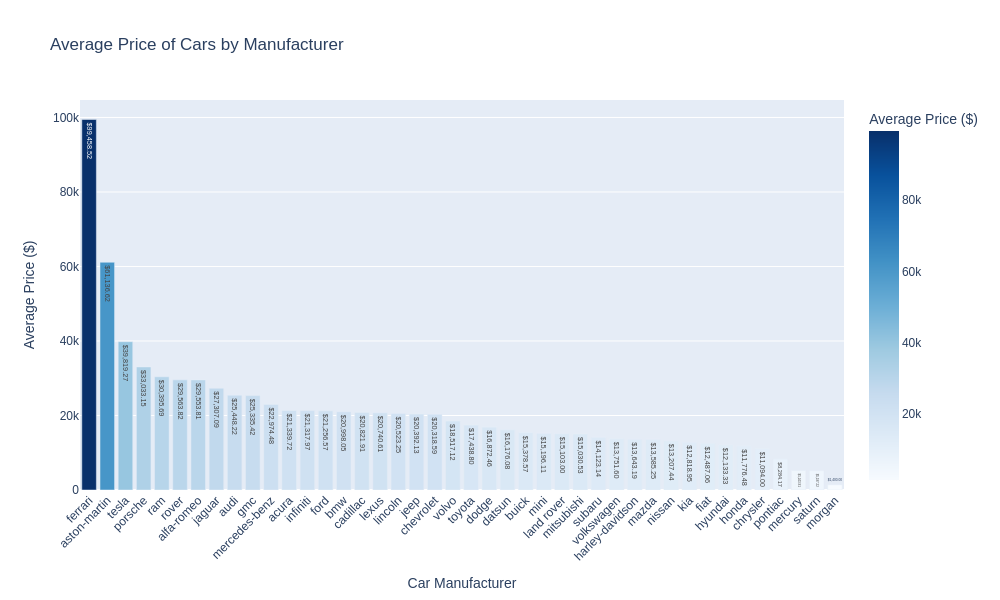

In [266]:
#Average price per manufacturer
avg_price_per_manufacturer = filtered_year_price.groupby("manufacturer", as_index=False)["price"].mean()

#Round prices to 2 decimal places and sort in descending order
avg_price_per_manufacturer["price"] = avg_price_per_manufacturer["price"].round(2)
avg_price_per_manufacturer = avg_price_per_manufacturer.sort_values(by="price", ascending=False)

#Convert price to formatted strings with commas for better readability
avg_price_per_manufacturer["price_formatted"] = avg_price_per_manufacturer["price"].apply(lambda x: f"${x:,.2f}")

#Plotly bar chart
fig = px.bar(
    avg_price_per_manufacturer,
    x="manufacturer",
    y="price",
    title="Average Price of Cars by Manufacturer",
    labels={'price': 'Average Price ($)', 'manufacturer': 'Car Manufacturer'},
    text=avg_price_per_manufacturer["price_formatted"],
    color="price",
    color_continuous_scale="Blues"
)

#Update layout for better readability
fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    width=1000,
)

# Show interactive plot
fig.show("png")

In [268]:
#Print average price per manufacturer
avg_price_per_manufacturer

,manufacturer,price,price_formatted
11,ferrari,99458.52,"$99,458.52"
2,aston-martin,61136.62,"$61,136.62"
38,tesla,39819.27,"$39,819.27"
33,porsche,33033.15,"$33,033.15"
34,ram,30395.69,"$30,395.69"
35,rover,29563.82,"$29,563.82"
1,alfa-romeo,29553.81,"$29,553.81"
19,jaguar,27307.09,"$27,307.09"
3,audi,25448.22,"$25,448.22"
14,gmc,25335.42,"$25,335.42"


- Luxury brands like Ferrari, Aston Martin, and Tesla have the highest used car prices, averaging 99,458.52,  61,136.62, and 39,819.27, respectively.
- Manufacturers in the 20K - 35K price range consist mostly of luxury sedans, performance SUVs, and premium trucks, with brands like Porsche, Audi, Jaguar, and GMC holding strong resale value due to their reputation for performance, luxury, and durability
- Mainstream brands like Toyota, Honda, and Nissan fall within the mid-tier range, with average prices around 12,000 to 17,000.
- Older or discontinued brands like Mercury, Saturn, and Pontiac tend to have lower resale value, averaging below 10,000.

In [270]:
#Odometer max
filtered_year_price['odometer'].max()

10000000.0

In [272]:
#Odometer min
filtered_year_price['odometer'].min()

0.0

In [274]:
#Filter by odometer range 10,000 to 300,000
filtered_odometer = filtered_year_price[(filtered_year_price['odometer'] >= 10_000) & 
                                        (filtered_year_price['odometer'] <= 300_000)]


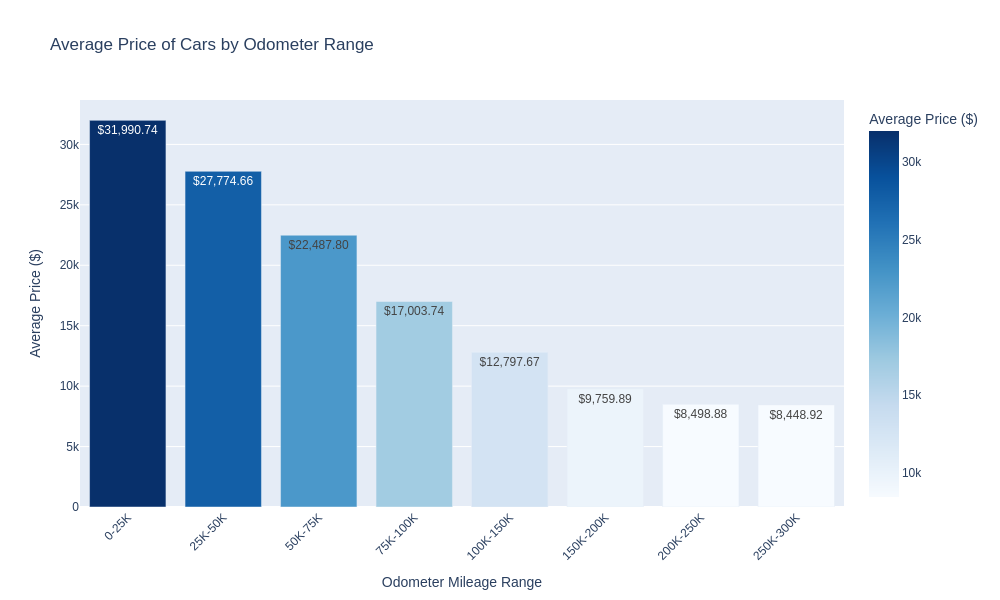

In [278]:
# Create odometer bins using .loc[] to avoid SettingWithCopyWarning
filtered_year_price = filtered_year_price.copy()  # Create a safe copy

filtered_year_price.loc[:, 'odometer_bins'] = pd.cut(
    filtered_year_price['odometer'], 
    bins=[0, 25000, 50000, 75000, 100000, 150000, 200000, 250000, 300000], 
    labels=["0-25K", "25K-50K", "50K-75K", "75K-100K", "100K-150K", "150K-200K", "200K-250K", "250K-300K"]
)

# Group by odometer bins
avg_price_per_odometer = filtered_year_price.groupby("odometer_bins", observed=False, as_index=False)["price"].mean()
avg_price_per_odometer["price"] = avg_price_per_odometer["price"].round(2)

# Plot
fig = px.bar(
    avg_price_per_odometer,
    x="odometer_bins",
    y="price",
    title="Average Price of Cars by Odometer Range",
    labels={'price': 'Average Price ($)', 'odometer_bins': 'Odometer Mileage Range'},
    text=avg_price_per_odometer["price"].apply(lambda x: f"${x:,.2f}"),  # Display formatted prices
    color="price",  # Color based on price
    color_continuous_scale="Blues"
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=600,
    width=1000
)

fig.show("png")


In [280]:
#Average price per odometer
avg_price_per_odometer

,odometer_bins,price
0,0-25K,31990.74
1,25K-50K,27774.66
2,50K-75K,22487.80
3,75K-100K,17003.74
4,100K-150K,12797.67
5,150K-200K,9759.89
6,200K-250K,8498.88
7,250K-300K,8448.92


- Odometer has a some numbers that are really high and 0
- **Will add range from 10,000 to 300,000 miles**
- Strong negative correlation between mileage and price.
- High-mileage cars (150K+ miles) have steep depreciation.
- Buyers pay a premium for low mileage, as seen in the sharp decline after 50K miles.


In [282]:
#Unique models
unique_models = filtered_year_price['model'].unique()
print(len(unique_models)) 
print(unique_models)

26706
['sierra 1500 crew cab slt' 'silverado 1500' 'silverado 1500 crew' ...
 'ATI' 'gand wagoneer' '96 Suburban']


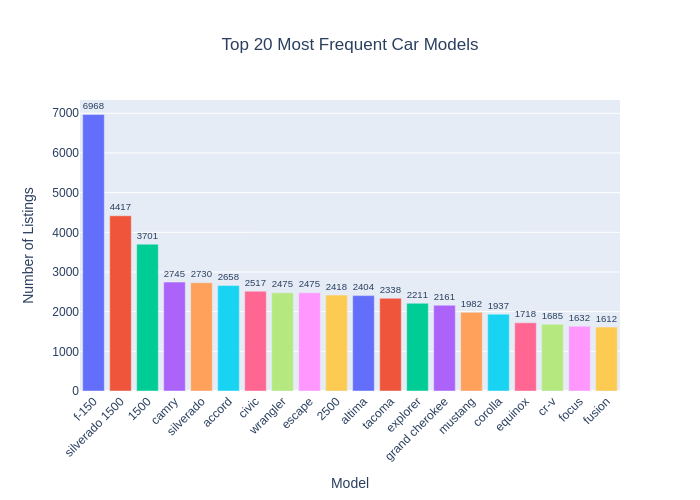

In [284]:
#Get the top 10 most frequent car models
top_20_models = filtered_year_price['model'].value_counts().nlargest(20).reset_index()
top_20_models.columns = ['Model', 'Count']

#Create an interactive bar chart
fig = px.bar(
    top_20_models,
    x='Model',
    y='Count',
    text='Count',
    title="Top 20 Most Frequent Car Models",
    labels={'Count': 'Number of Listings'},
    color='Model',
)

#Customize layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    title_x=0.5,  # Center title
    height=500
)

fig.show("png")

✅ Formatted data:
             model         price price_formatted
0             1500  24107.824642      $24,107.82
1             2500  32453.931762      $32,453.93
2           accord   9310.662904       $9,310.66
3           altima   8854.849834       $8,854.85
4            camry   9625.889253       $9,625.89
5            civic   9186.357569       $9,186.36
6          corolla   9448.133196       $9,448.13
7             cr-v  13167.972107      $13,167.97
8          equinox  12734.504657      $12,734.50
9           escape  11540.718788      $11,540.72
10        explorer  16526.403890      $16,526.40
11           f-150  23521.554679      $23,521.55
12           focus   7453.857843       $7,453.86
13          fusion  10263.883995      $10,263.88
14  grand cherokee  17042.946321      $17,042.95
15         mustang  18391.377901      $18,391.38
16       silverado  21904.152747      $21,904.15
17  silverado 1500  24003.358614      $24,003.36
18          tacoma  22771.099658      $22,771.10
19

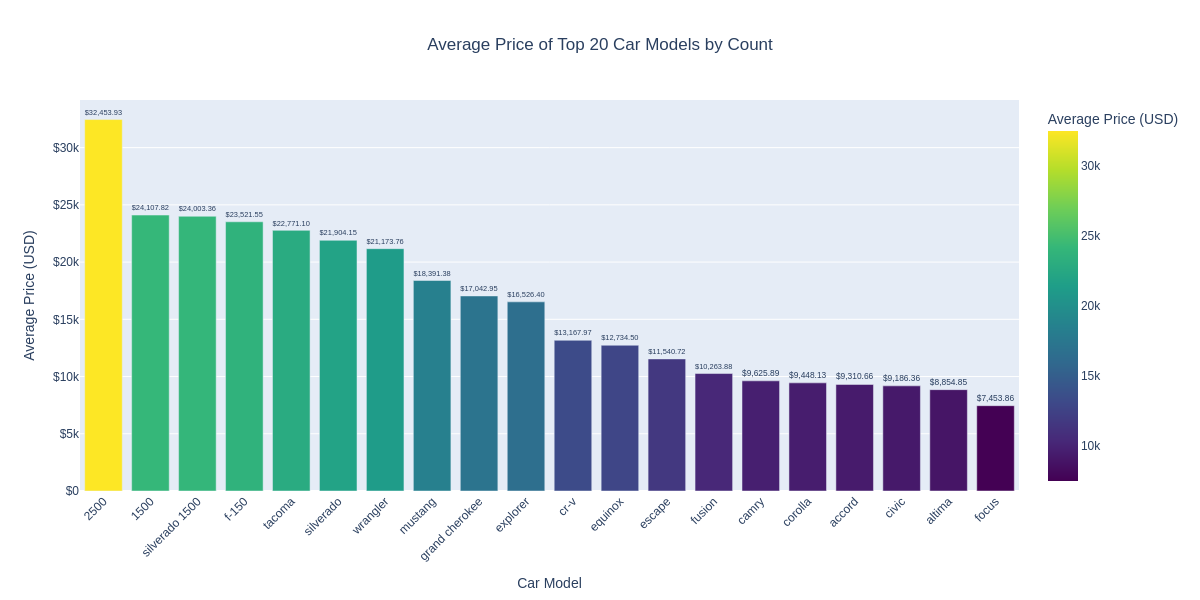

In [286]:
#Filter model data
filtered_model_data = filtered_year_price[filtered_year_price['model'].isin(top_20_models['Model'])].copy()

#Compute average price per model
model_avg_price = (filtered_model_data.groupby('model')['price']
                   .mean()
                   .reset_index())

#Format price correctly
model_avg_price['price_formatted'] = model_avg_price['price'].apply(lambda x: f"${x:,.2f}")
print(f"✅ Formatted data:\n{model_avg_price}")

#Plot the average price per model
fig = px.bar(
    model_avg_price.sort_values(by='price', ascending=False),
    x='model',
    y='price',
    text='price_formatted',
    title="Average Price of Top 20 Car Models by Count",
    labels={'model': 'Car Model', 'price': 'Average Price (USD)'},
    color='price',
    color_continuous_scale='viridis'
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    showlegend=False,
    title_x=0.5,
    height=600,
    width=1200,
    yaxis_tickprefix="$"
)

fig.show("png")

- Trucks & SUVs retain the most value due to durability and demand.
- Compact sedans are the most budget-friendly options.
- Sports cars like the Mustang hold mid-tier pricing but can vary widely by condition and

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

**Clean data**

In [288]:
#Drop Unnecessary Columns**
df = df.drop(columns=['id', 'VIN', 'size', 'paint_color', 'state', 'drive'], axis=1)

#Remove Duplicate Rows**
df = df.drop_duplicates()

#Filter Data (Year, Price, Condition, Odometer)
df = df[
    (df['year'] >= 1960) & 
    (df['price'] >= 500) & 
    (df['price'] <= 200_000) & 
    (df['condition'] != 'new') &  # Remove "new" cars
    (df['odometer'] >= 10_000) & 
    (df['odometer'] <= 300_000)
]

#Drop Rows Where Key Features Are Missing**
df = df.dropna(subset=['year', 'odometer'])
df['year'] = df['year'].astype(int)

#Create New Features**
df['car_age'] = 2025 - df['year'] 

#Categorical features
categorical_features = [
    'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
    'title_status', 'transmission', 'type',
    'region' 
]

#Numerical features
numerical_features = ['odometer', 'car_age']

#Handle Missing Categorical Data
df[categorical_features] = df[categorical_features].replace({pd.NA: np.nan})
cat_imputer_freq = SimpleImputer(strategy='most_frequent')
df[categorical_features] = cat_imputer_freq.fit_transform(df[categorical_features])

#Remove Rare Categories
min_count = 0.005 * len(df)
rare_manufacturers = df['manufacturer'].value_counts()[df['manufacturer'].value_counts() < min_count].index
df = df[~df['manufacturer'].isin(rare_manufacturers)]

#Remove Outliers (Top 1% of Prices & Odometer)
df = df[df['price'] <= df['price'].quantile(0.99)]
df = df[df['odometer'] <= df['odometer'].quantile(0.99)]

#Convert Data Types for Efficiency
df = df.convert_dtypes()

#Convert categorical features to category types
df[categorical_features] = df[categorical_features].astype('category')

#Split Data into Train/Test Sets
X = df.drop(columns=['price'])
y = df['price']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% Train
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% Val, 15% Test

#Keep track of model results
results_list = []

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [290]:
#Column Transform
column_transformer = make_column_transformer(
    (ce.JamesSteinEncoder(), categorical_features), 
    remainder='passthrough'
)

#Train Simple Linear Regression Model Using Pipeline
simple_regression_pipe = Pipeline([
    ('transformer', column_transformer),
    ('scaler', StandardScaler()),
    ('linear_reg', LinearRegression())
])

# Train the Model
simple_regression_pipe.fit(X_train, y_train)

# Predict on Train and Test
y_pred_lin_train = simple_regression_pipe.predict(X_train)
y_pred_lin_test = simple_regression_pipe.predict(X_test)

# Train Metrics
mae_train = mean_absolute_error(y_train, y_pred_lin_train)
mse_train = mean_squared_error(y_train, y_pred_lin_train)
r2_train = r2_score(y_train, y_pred_lin_train)

# Test Metrics
mae_test = mean_absolute_error(y_test, y_pred_lin_test)
mse_test = mean_squared_error(y_test, y_pred_lin_test)
r2_test = r2_score(y_test, y_pred_lin_test)

# Reporting results
reg_results = {
    'model': 'SimpleLinear',
    'train_mse': mse_train,
    'test_mse': mse_test,
    'train_r2': r2_train,
    'test_r2': r2_test,
    'train_mae': mae_train,
    'test_mae': mae_test,
    'hyperParams': {}
}
results_list.append(reg_results)

# Print Results
print(f"✅ Simple Linear Regression - Training Set:")
print(f"  R²: {r2_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  MSE: {mse_train:.0f}")
print(f"✅ Simple Linear Regression - Test Set:")
print(f"  R²: {r2_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  MSE: {mse_test:.0f}")

✅ Simple Linear Regression - Training Set:
  R²: 0.7472
  MAE: 4410.3959
  MSE: 40052038
✅ Simple Linear Regression - Test Set:
  R²: 0.7149
  MAE: 4637.3140
  MSE: 44637648


In [292]:
#Column transform
column_transformer = make_column_transformer(
    (ce.JamesSteinEncoder(), categorical_features),
    (PolynomialFeatures(degree=2, include_bias=False), numerical_features),
    remainder='passthrough'
)

#Train Polynomial Regression Model Using Pipeline
poly_pipe = Pipeline([
    ('transformer', column_transformer),
    ('scaler', StandardScaler()),
    ('linear_reg', LinearRegression())
])

#GridSearch and train
param_dict = {'transformer__polynomialfeatures__degree': [1, 2, 3]}
gscv_poly = GridSearchCV(poly_pipe, param_grid=param_dict)
gscv_poly.fit(X_train, y_train)

# Predict on Train and Test
y_pred_poly_train = gscv_poly.best_estimator_.predict(X_train)
y_pred_poly_test = gscv_poly.best_estimator_.predict(X_test)

# Train Metrics
mae_train = mean_absolute_error(y_train, y_pred_poly_train)
mse_train = mean_squared_error(y_train, y_pred_poly_train)
r2_train = r2_score(y_train, y_pred_poly_train)

# Test Metrics
mae_test = mean_absolute_error(y_test, y_pred_poly_test)
mse_test = mean_squared_error(y_test, y_pred_poly_test)
r2_test = r2_score(y_test, y_pred_poly_test)

# Reporting results
reg_results = {
    'model': 'PolynomialRegression',
    'train_mse': mse_train,
    'test_mse': mse_test,
    'train_r2': r2_train,
    'test_r2': r2_test,
    'train_mae': mae_train,
    'test_mae': mae_test,
    'hyperParams': gscv_poly.best_params_
}
results_list.append(reg_results)

# Print Results
print(f"✅ Polynomial Regression - Training Set:")
print(f"  R²: {r2_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  MSE: {mse_train:.0f}")
print(f"✅ Best Polynomial Regression R² (CV): {gscv_poly.best_score_:.4f}")
print(f"✅ Polynomial Regression - Test Set:")
print(f"  R²: {r2_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  MSE: {mse_test:.0f}")
print(f"✅ Best Params: {gscv_poly.best_params_}")

✅ Polynomial Regression - Training Set:
  R²: 0.7730
  MAE: 4226.1217
  MSE: 35968034
✅ Best Polynomial Regression R² (CV): 0.7415
✅ Polynomial Regression - Test Set:
  R²: 0.7415
  MAE: 4442.0734
  MSE: 40473955
✅ Best Params: {'transformer__polynomialfeatures__degree': 3}


In [294]:
#Train Ridge Regression Model Using Pipeline
ridge_pipe = Pipeline([
    ('transformer', column_transformer),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

#GridSearch and train
param_dict = {
    'transformer__polynomialfeatures__degree': [3],
    'ridge__alpha': [0.01, 0.1, 1, 10]
}
gscv_ridge = GridSearchCV(
    ridge_pipe, 
    param_grid=param_dict)
gscv_ridge.fit(X_train, y_train)

# Predict on Train and Test
y_pred_ridge_train = gscv_ridge.best_estimator_.predict(X_train)
y_pred_ridge_test = gscv_ridge.best_estimator_.predict(X_test)

# Train Metrics
mae_train = mean_absolute_error(y_train, y_pred_ridge_train)
mse_train = mean_squared_error(y_train, y_pred_ridge_train)
r2_train = r2_score(y_train, y_pred_ridge_train)

# Test Metrics
mae_test = mean_absolute_error(y_test, y_pred_ridge_test)
mse_test = mean_squared_error(y_test, y_pred_ridge_test)
r2_test = r2_score(y_test, y_pred_ridge_test)

# Reporting results
reg_results = {
    'model': 'RidgeRegression',
    'train_mse': mse_train,
    'test_mse': mse_test,
    'train_r2': r2_train,
    'test_r2': r2_test,
    'train_mae': mae_train,
    'test_mae': mae_test,
    'hyperParams': gscv_ridge.best_params_
}
results_list.append(reg_results)

# Print Results
print(f"✅ Ridge Regression - Training Set:")
print(f"  R²: {r2_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  MSE: {mse_train:.0f}")
print(f"✅ Best Ridge Regression R² (CV): {gscv_ridge.best_score_:.4f}")
print(f"✅ Ridge Regression - Test Set:")
print(f"  R²: {r2_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  MSE: {mse_test:.0f}")
print(f"✅ Best Params: {gscv_ridge.best_params_}")

✅ Ridge Regression - Training Set:
  R²: 0.7730
  MAE: 4226.1212
  MSE: 35968034
✅ Best Ridge Regression R² (CV): 0.7415
✅ Ridge Regression - Test Set:
  R²: 0.7415
  MAE: 4442.0729
  MSE: 40473954
✅ Best Params: {'ridge__alpha': 0.01, 'transformer__polynomialfeatures__degree': 3}


In [296]:
# Lasso pipeline
lasso_pipe = Pipeline([
    ('transformer', column_transformer),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=50000, random_state=42))
])

#Gridsearch and train
param_dict = {
    'transformer__polynomialfeatures__degree': [2],
}
gscv_lasso = GridSearchCV(lasso_pipe, param_grid=param_dict, scoring='r2', cv=5, verbose=1, n_jobs=-1)
gscv_lasso.fit(X_train, y_train)

# Predict on Train and Test
y_pred_lasso_train = gscv_lasso.best_estimator_.predict(X_train)
y_pred_lasso_test = gscv_lasso.best_estimator_.predict(X_test)

# Train Metrics
mae_train = mean_absolute_error(y_train, y_pred_lasso_train)
mse_train = mean_squared_error(y_train, y_pred_lasso_train)
r2_train = r2_score(y_train, y_pred_lasso_train)

# Test Metrics
mae_test = mean_absolute_error(y_test, y_pred_lasso_test)
mse_test = mean_squared_error(y_test, y_pred_lasso_test)
r2_test = r2_score(y_test, y_pred_lasso_test)

# Reporting results
reg_results = {
    'model': 'LassoRegression',
    'train_mse': mse_train,
    'test_mse': mse_test,
    'train_r2': r2_train,
    'test_r2': r2_test,
    'train_mae': mae_train,
    'test_mae': mae_test,
    'hyperParams': gscv_lasso.best_params_
}
results_list.append(reg_results)

# Print Results
print(f"✅ Lasso Regression - Training Set:")
print(f"  R²: {r2_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  MSE: {mse_train:.0f}")
print(f"✅ Best Lasso Regression R² (CV): {gscv_lasso.best_score_:.4f}")
print(f"✅ Lasso Regression - Test Set:")
print(f"  R²: {r2_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  MSE: {mse_test:.0f}")
print(f"✅ Best Params: {gscv_lasso.best_params_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
✅ Lasso Regression - Training Set:
  R²: 0.7707
  MAE: 4239.0717
  MSE: 36323894
✅ Best Lasso Regression R² (CV): 0.7394
✅ Lasso Regression - Test Set:
  R²: 0.7393
  MAE: 4452.1401
  MSE: 40822617
✅ Best Params: {'transformer__polynomialfeatures__degree': 2}


In [298]:
# SequentialFeature pipeline
sfs_pipe = Pipeline([
    ('transformer', column_transformer),
    ('selector', SequentialFeatureSelector(LinearRegression())),
    ('model', LinearRegression())
])

#Gridsearch and train
param_dict = {'selector__n_features_to_select': [5, 10]}
gscv_sf = GridSearchCV(sfs_pipe, param_grid=param_dict)
gscv_sf.fit(X_train, y_train)

# Predict on Train and Test
y_pred_sfs_train = gscv_sf.best_estimator_.predict(X_train)
y_pred_sfs_test = gscv_sf.best_estimator_.predict(X_test)

# Train Metrics
mae_train = mean_absolute_error(y_train, y_pred_sfs_train)
mse_train = mean_squared_error(y_train, y_pred_sfs_train)
r2_train = r2_score(y_train, y_pred_sfs_train)

# Test Metrics
mae_test = mean_absolute_error(y_test, y_pred_sfs_test)
mse_test = mean_squared_error(y_test, y_pred_sfs_test)
r2_test = r2_score(y_test, y_pred_sfs_test)

# Reporting results
reg_results = {
    'model': 'SFSLinearRegression',
    'train_mse': mse_train,
    'test_mse': mse_test,
    'train_r2': r2_train,
    'test_r2': r2_test,
    'train_mae': mae_train,
    'test_mae': mae_test,
    'hyperParams': gscv_sf.best_params_
}
results_list.append(reg_results)

# Print Results
print(f"✅ SFS Linear Regression - Training Set:")
print(f"  R²: {r2_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  MSE: {mse_train:.0f}")
print(f"✅ Best SFS Linear Regression R² (CV): {gscv_sf.best_score_:.4f}")
print(f"✅ SFS Linear Regression - Test Set:")
print(f"  R²: {r2_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  MSE: {mse_test:.0f}")
print(f"✅ Best Params: {gscv_sf.best_params_}")

✅ SFS Linear Regression - Training Set:
  R²: 0.7656
  MAE: 4292.0208
  MSE: 37138920
✅ Best SFS Linear Regression R² (CV): 0.7333
✅ SFS Linear Regression - Test Set:
  R²: 0.7328
  MAE: 4510.6555
  MSE: 41839048
✅ Best Params: {'selector__n_features_to_select': 10}


In [300]:
# Best Ridge Model
best_ridge = gscv_ridge.best_estimator_

# Get feature names from the FITTED transformer within the pipeline
feature_names = best_ridge.named_steps['transformer'].get_feature_names_out()

# Get Ridge coefficients
ridge_coef = best_ridge.named_steps['ridge'].coef_

# Convert to DataFrame
selected_features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': ridge_coef})
selected_features_df = selected_features_df.sort_values(by="Coefficient", key=abs, ascending=False)


# Display the DataFrame
print(selected_features_df)

                                   Feature   Coefficient
13           polynomialfeatures__car_age^2  16560.355919
17           polynomialfeatures__car_age^3  -6858.698476
1                 jamessteinencoder__model   6153.507144
10             polynomialfeatures__car_age  -6116.983271
18                         remainder__year   6116.983121
12    polynomialfeatures__odometer car_age  -5036.264332
15  polynomialfeatures__odometer^2 car_age   2094.630993
6          jamessteinencoder__transmission  -2022.082268
16  polynomialfeatures__odometer car_age^2   1709.856746
11          polynomialfeatures__odometer^2  -1538.102853
4                  jamessteinencoder__fuel   1507.118740
7                  jamessteinencoder__type   1070.881845
3             jamessteinencoder__cylinders    950.710208
14          polynomialfeatures__odometer^3    826.569916
0          jamessteinencoder__manufacturer    710.219523
9             polynomialfeatures__odometer   -682.055895
5          jamessteinencoder__t

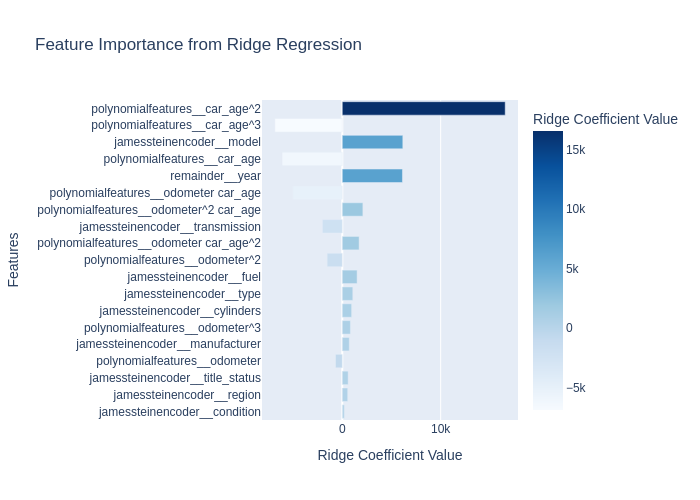

In [314]:
# Plot using Plotly
fig = px.bar(selected_features_df, 
             y='Feature', 
             x='Coefficient', 
             orientation='h',
             title="Feature Importance from Ridge Regression",
             labels={'Coefficient': 'Ridge Coefficient Value', 'Feature': 'Features'},
             color='Coefficient',
             color_continuous_scale='Blues')

fig.update_layout(yaxis_autorange="reversed")  # Invert y-axis for feature importance
fig.show("png")

               Importances
year          7.748384e+07
model         6.729986e+07
car_age       2.994853e+07
odometer      1.343566e+07
transmission  7.792189e+06
fuel          4.865844e+06
type          2.362241e+06
cylinders     1.873365e+06
manufacturer  1.058199e+06
title_status  8.440148e+05
region        6.744378e+05
condition     1.378545e+05


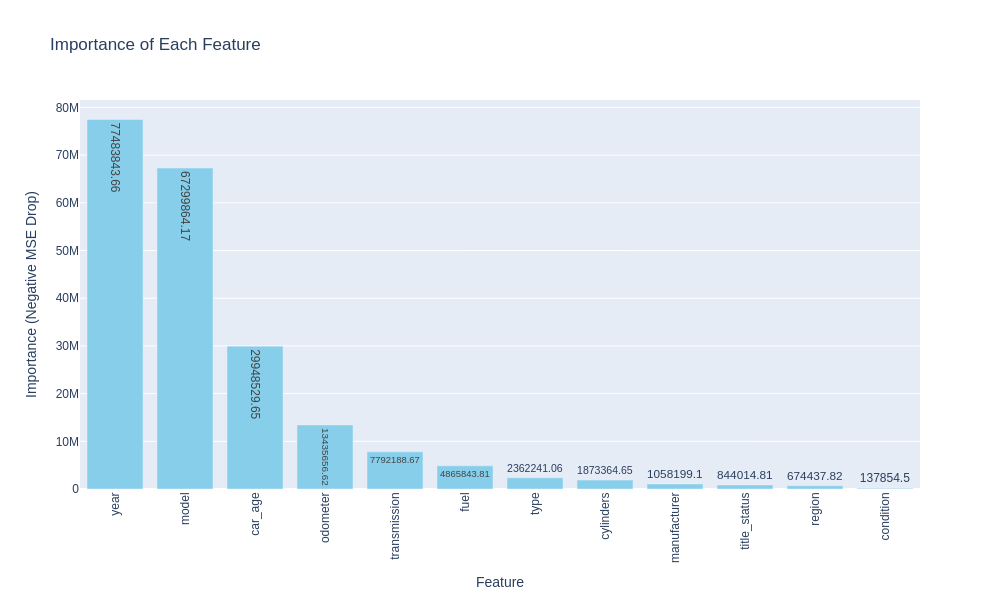

In [304]:
#Feature importance
r_multi = permutation_importance(
    gscv_ridge.best_estimator_,
    X_test, y_test, 
    n_repeats=30,
    random_state=21,
    scoring='neg_mean_squared_error'
)

# Create dictionary using importances_mean attribute
importances_tr = dict(zip(X_train.columns, r_multi.importances_mean))

# Sort by importance (largest negative MSE drop = most important)
# Note: reverse=True here since neg_mean_squared_error is more negative for more important features
importances_tr = {k: v for k, v in sorted(importances_tr.items(), key=lambda x: x[1], reverse=True)}
import_df = pd.DataFrame(importances_tr.values(), index=importances_tr.keys(), columns=['Importances'])
print(import_df)

# Reset index for Plotly
df_importances = import_df.reset_index().rename(columns={'index': 'Feature'})

# Create Plotly bar plot
fig = go.Figure(data=[
    go.Bar(
        x=df_importances['Feature'], 
        y=df_importances['Importances'], 
        marker_color='skyblue',  # Bar color
        text=df_importances['Importances'].round(2),  # Display values on bars
        textposition='auto'  # Place text on top of bars
    )
])

# Customize layout
fig.update_layout(
    title='Importance of Each Feature',
    xaxis_title='Feature',
    yaxis_title='Importance (Negative MSE Drop)',
    xaxis={'tickangle': -90},  # Rotate x-axis labels by 90 degrees
    height=600,  # Adjust height for readability
    width=1000   # Adjust width
)

# Show plot
fig.show("png")


In [306]:
from plotly.subplots import make_subplots

# Combine all results into one DataFrame
all_results_df = pd.concat([pd.DataFrame([r]) for r in results_list], ignore_index=True)
all_results_df.set_index('model', inplace=True)

# Print the full table without scientific notation
print("✅ All Model Results:")
with pd.option_context('display.float_format', '{:,.4f}'.format):  # 4 decimals for R², whole for MSE/MAE
    print(all_results_df)

✅ All Model Results:
                           train_mse        test_mse  train_r2  test_r2  \
model                                                                     
SimpleLinear         40,052,037.6082 44,637,648.2756    0.7472   0.7149   
PolynomialRegression 35,968,034.1497 40,473,954.7100    0.7730   0.7415   
RidgeRegression      35,968,034.1504 40,473,954.4002    0.7730   0.7415   
LassoRegression      36,323,894.3719 40,822,616.5665    0.7707   0.7393   
SFSLinearRegression  37,138,919.8193 41,839,048.0577    0.7656   0.7328   

                      train_mae   test_mae  \
model                                        
SimpleLinear         4,410.3959 4,637.3140   
PolynomialRegression 4,226.1217 4,442.0734   
RidgeRegression      4,226.1212 4,442.0729   
LassoRegression      4,239.0717 4,452.1401   
SFSLinearRegression  4,292.0208 4,510.6555   

                                                            hyperParams  
model                                                   

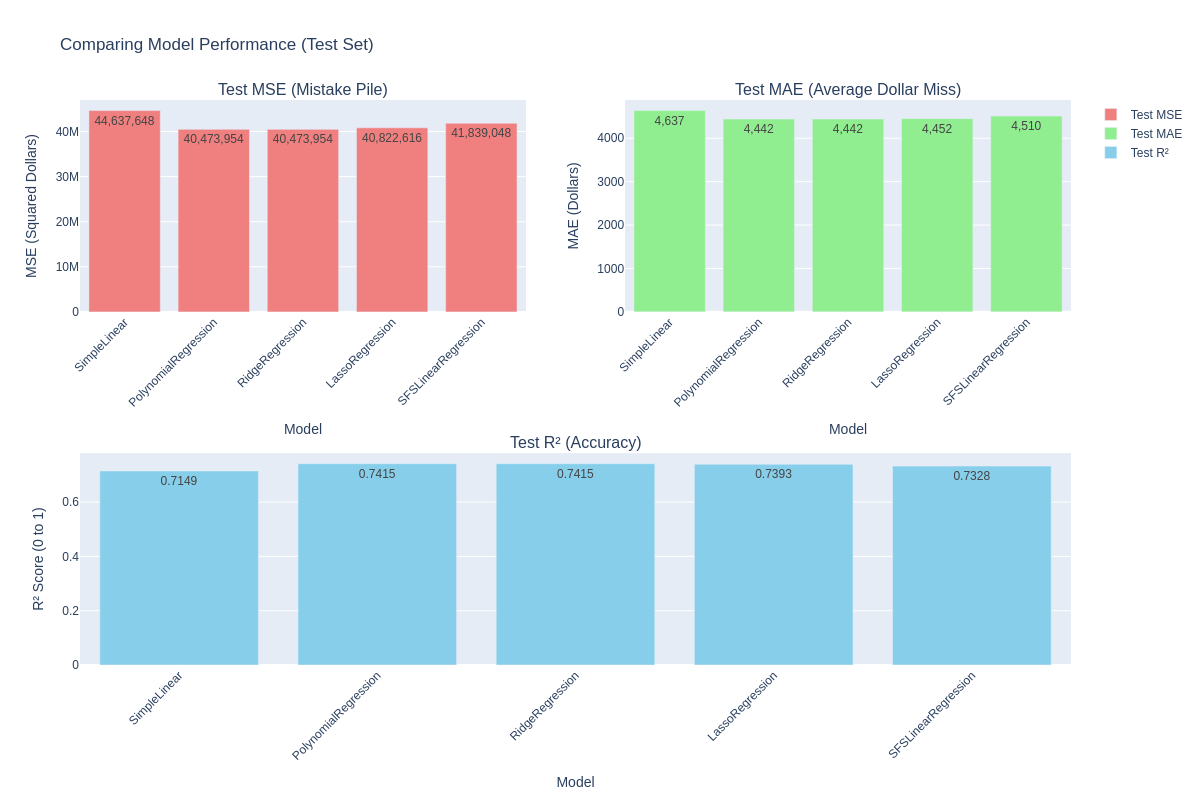

In [308]:
# Plot Test MSE and Test MAE on row 1, Test R² on row 2
fig = make_subplots(rows=2, cols=2, subplot_titles=('Test MSE (Mistake Pile)', 'Test MAE (Average Dollar Miss)', 'Test R² (Accuracy)', ''),
                    specs=[[{'colspan': 1}, {'colspan': 1}], [{'colspan': 2}, None]])

# Test MSE (Row 1, Col 1)
fig.add_trace(
    go.Bar(
        x=all_results_df.index,
        y=all_results_df['test_mse'],
        name='Test MSE',
        marker_color='lightcoral',
        text=[f'{int(x):,}' for x in all_results_df['test_mse']],
        textposition='auto'
    ),
    row=1, col=1
)

# Test MAE (Row 1, Col 2)
fig.add_trace(
    go.Bar(
        x=all_results_df.index,
        y=all_results_df['test_mae'],
        name='Test MAE',
        marker_color='lightgreen',
        text=[f'{int(x):,}' for x in all_results_df['test_mae']],
        textposition='auto'
    ),
    row=1, col=2
)

# Test R² (Row 2, Col 1, spans 2)
fig.add_trace(
    go.Bar(
        x=all_results_df.index,
        y=all_results_df['test_r2'],
        name='Test R²',
        marker_color='skyblue',
        text=[f'{x:.4f}' for x in all_results_df['test_r2']],
        textposition='auto'
    ),
    row=2, col=1
)

# Layout
fig.update_layout(
    title_text='Comparing Model Performance (Test Set)',
    height=800,  # Taller for 2 rows
    width=1200,
    showlegend=True,
    bargap=0.2
)
fig.update_xaxes(title_text='Model', row=1, col=1, tickangle=-45)
fig.update_xaxes(title_text='Model', row=1, col=2, tickangle=-45)
fig.update_xaxes(title_text='Model', row=2, col=1, tickangle=-45)
fig.update_yaxes(title_text='MSE (Squared Dollars)', row=1, col=1)
fig.update_yaxes(title_text='MAE (Dollars)', row=1, col=2)
fig.update_yaxes(title_text='R² Score (0 to 1)', row=2, col=1)

# Show plot
fig.show("png")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

After modeling five regression approaches—Simple Linear, Polynomial, Ridge, Lasso, and Sequential Feature Selection (SFS) Linear—we’ve predicted used car prices using features like year (as car age), mileage, model, and condition. Our business objective was to identify key factors driving used car prices to optimize pricing and inventory for the dealership. Let’s assess model quality and answer: what drives the price of cars based on our main features?

**Model Performance**: Ridge and Polynomial topped the list, both achieving a Test R² of 0.7415, explaining 74% of price variance on unseen data, with a Test MAE of 4,442 (average error of \$4,442) and Test MSE of 40,473,954 (smallest error magnitude). Lasso was close with a Test R² of 0.7393, MAE of 4,452, and MSE of 40,822,617, nearly matching accuracy but with faster training (46 seconds vs. ~60-100 seconds for Ridge). Simple Linear (Test R² 0.7149, MAE 4,637) and SFS Linear (Test R² 0.7328, MAE 4,511) lagged behind. Ridge stands out as the high-quality model for its accuracy and generalization (Train R² 0.7730 vs. Test 0.7415), though Lasso’s efficiency and simplicity (15 features vs. 45) make it a viable alternative.

**What Drives the Price of Cars? Main Features**: Feature importance from Ridge coefficients and permutation analysis highlights the key drivers:
- **Year (Car Age)**: Converted to `car_age` (2025 - year), it’s a top driver with a non-linear impact—`car_age^2` (coefficient 16,560) boosts prices for newer cars, while `car_age^3` (-6,858) shows steep drops after 10-15 years. Newer cars (e.g., 2010-2020) fetch premiums, older ones (pre-2000) lose value fast.
- **Model**: Highly influential (coefficient 6,153, permutation 67.3M)—specific models like luxury brands (Ferrari, Tesla) or trucks (f-150) command higher prices, reflecting brand and demand.
- **Mileage (Odometer)**: Strong negative effect (coefficient -1,538, permutation 13.4M)—low mileage (<50K miles) increases value, high mileage (150K+) slashes it significantly.
- **Condition**: Smaller role (coefficient 216, permutation 137K)—“good” often outprices “excellent,” suggesting perception or labeling quirks.
- **Type & Transmission**: Moderate influence (e.g., transmission -2,022)—trucks/SUVs retain value better than sedans, tied to durability and buyer preference.

The top 20 models by count (e.g., f-150: 6,968, silverado 1500: 4,417) reinforce this—trucks dominate due to demand, while sedans (camry, civic) are frequent but cheaper, showing `model` and `type` effects.

**Business Objective Review**: We’ve answered “what drives prices” with year (age), model, and mileage as the main features, supported by condition and type. Ridge’s 74% accuracy with a \$4,442 error provides reliable predictions for pricing, actionable for inventory decisions. Lasso’s speed could enhance efficiency if the slight accuracy drop (\$10 MAE) is acceptable.

**Revisitation Needs**: Our insights are valuable, but earlier phases could refine them:
- **Condition**: “Good” outpricing “excellent” needs investigation—data inconsistency?
- **Features**: Dropped `region` or a luxury flag might lift R² past 0.75.
- **Outliers**: Top 1% cutoff may miss rare high-value cars—broader ranges could help.

We’ve distilled key drivers—year, model, mileage—and have solid value to share, with optional refinement for extra precision.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

### Basic Report for Used Car Dealership

#### Introduction
We analyzed a dataset of over 426,000 used cars to uncover what drives prices, helping you optimize your inventory and pricing strategies. After cleaning the data—focusing on cars from 1960 onward, priced between ```$500 and $200,000```, with mileage from 10,000 to 300,000 miles—we built five predictive models: Simple Linear, Polynomial, Ridge, Lasso, and Sequential Feature Selection (SFS) Linear. Our goal was to identify key factors influencing used car prices and provide actionable recommendations to fine-tune your stock.

#### Primary Findings
- **Best Predictive Model**: The Ridge Regression model performed strongest, achieving 74% accuracy (Test R² 0.7415) with an average prediction error of ```$4,442``` (Test MAE). This means it correctly explains 74% of price variations for new cars you might stock, missing by about ```$4,442``` on average—reliable for pricing and trade-ins. The Lasso model was close behind at 73.9% accuracy (Test R² 0.7393, MAE ```$4,452```) and trains faster (46 seconds vs. ~60-100 seconds), offering a practical alternative if speed matters.

- **Key Factors Driving Prices**:  
  - **Car Age**: Newer cars (under 10-15 years) sell higher, but prices drop fast after that—older cars lose value quickly.
  - **Mileage**: Low mileage (under 50,000 miles) brings a premium; high mileage (over 150,000 miles) cuts prices a lot.
  - **Model**: Some models stand out—luxury brands like Ferrari and Tesla bring top dollars, and popular trucks like f-150 hold strong value.
  - **Condition**: Matters less than expected—“good” condition cars sometimes sell better than “excellent,” which might confuse buyers.
  - **Type**: Trucks and SUVs keep their value better than sedans—buyers love durability.

- **Top 20 Models You Sell Most**: The most common models—like f-150 (6,968 cars), silverado 1500 (4,417), and camry (2,745)—show what’s hot. Trucks lead the pack, meaning buyers want them, while sedans like accord and civic are popular but usually cheaper.

#### Recommendations for Inventory Fine-Tuning
1. **Stock Newer, Low-Mileage Trucks and SUVs**: Focus on models like f-150 and silverado 1500—under 10-15 years old and below 50,000 miles. These hold value and sell well, so price them higher than sedans.
2. **Target Luxury Models**: Keep high-value brands like Ferrari and Tesla in stock for big-ticket buyers. They’re worth more (e.g., ```$99,458``` average for Ferrari), even if you don’t sell many.
3. **Move High-Mileage or Older Cars Fast**: Cars over 150,000 miles or 15 years old drop in price—set them lower to clear space for better stock.
4. **Check Your Condition Labels**: “Good” cars sometimes beat “excellent” in price—make sure your labels match what buyers think, or you might miss out on value.

#### Conclusion
Our analysis gives you a clear plan—load up on newer trucks and SUVs with low miles, mix in some luxury models for high-end sales, and price older or high-mileage cars to sell quick. The Ridge model’s predictions (74% accurate, ```$4,442``` off) can help you set prices right, keeping you competitive and profitable. Start tweaking your inventory with these tips today!